In [4]:
import os

# Definir o diretório de trabalho
os.chdir('C:/Users/Daniel/Downloads')

import pandas as pd

# Definir o caminho do arquivo Excel
file_path = 'C:/Users/Daniel/Downloads/onlineretail.xlsx'

# Ler o arquivo Excel com um limite de 100 mil registros
dados = pd.read_excel(file_path, engine='openpyxl', nrows=100000)

# Exibir as primeiras linhas do dataframe
print(dados.head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  


Informações Gerais do Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    100000 non-null  object        
 1   StockCode    100000 non-null  object        
 2   Description  99701 non-null   object        
 3   Quantity     100000 non-null  int64         
 4   InvoiceDate  100000 non-null  datetime64[ns]
 5   UnitPrice    100000 non-null  float64       
 6   CustomerID   65085 non-null   float64       
 7   Country      100000 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 6.1+ MB
None
Amostra de Dados:
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID 

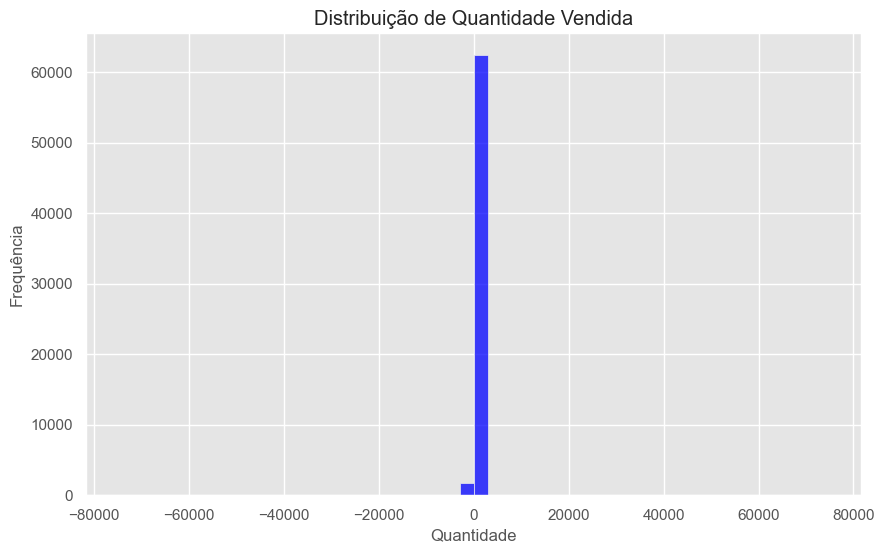

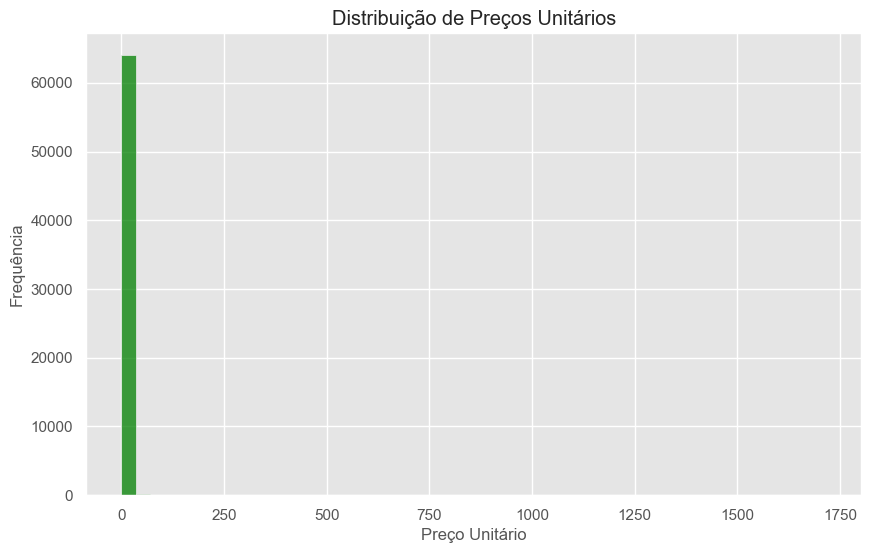

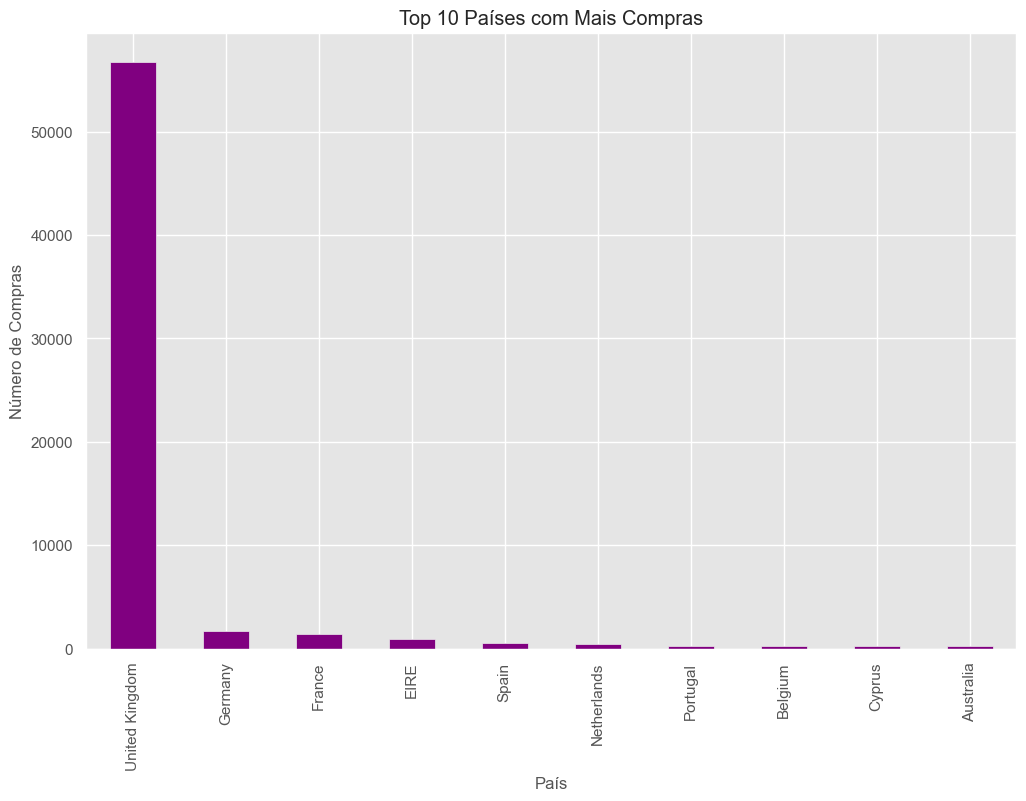

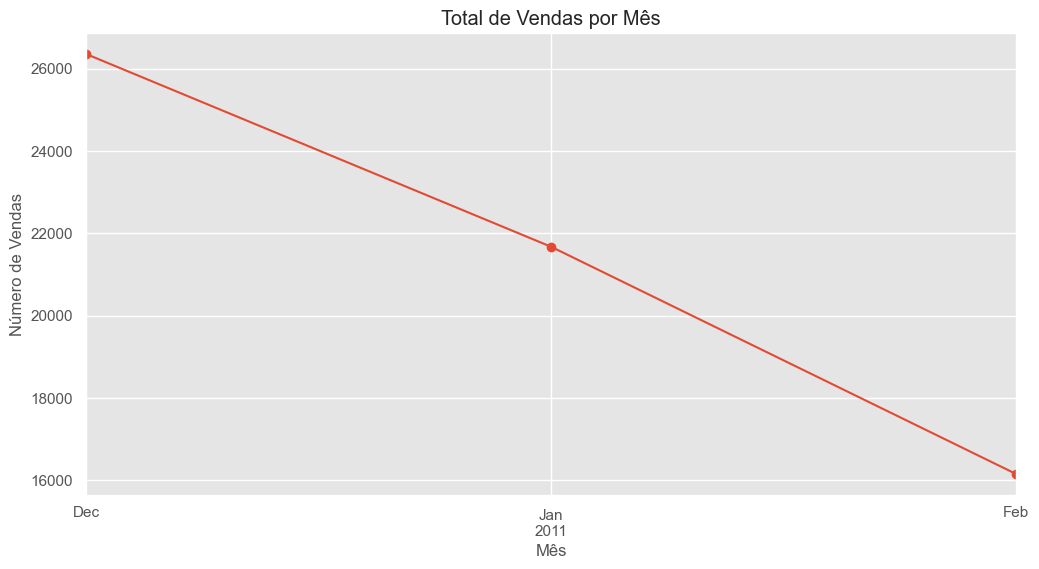

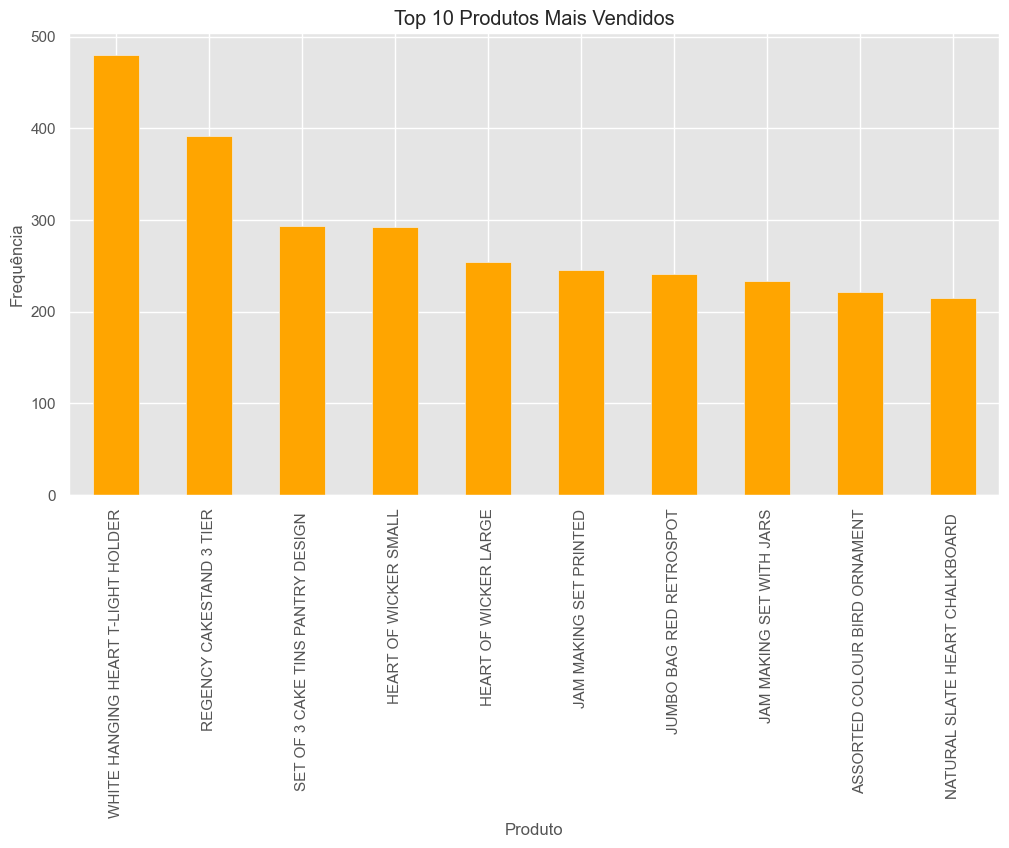

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Configurações para visualizações mais bonitas
sns.set(style="whitegrid")
plt.style.use("ggplot")
# Exibindo informações básicas do dataset
print("Informações Gerais do Dataset:")
print(dados.info())

# Exibindo as primeiras 5 linhas
print("Amostra de Dados:")
print(dados.head())

# Verificando valores ausentes
print("Valores Ausentes:")
print(dados.isnull().sum())

# Excluindo linhas com valores ausentes (ou, alternativamente, podemos preencher esses valores)
dados.dropna(inplace=True)

# Remover duplicatas, se houver
dados.drop_duplicates(inplace=True)

# Verificar o resumo estatístico
print("Resumo Estatístico:")
print(dados.describe())

# Exibindo a distribuição da variável 'Quantity'
plt.figure(figsize=(10,6))
sns.histplot(dados['Quantity'], kde=False, bins=50, color='blue')
plt.title('Distribuição de Quantidade Vendida')
plt.xlabel('Quantidade')
plt.ylabel('Frequência')
plt.show()

# Exibindo a distribuição de 'UnitPrice'
plt.figure(figsize=(10,6))
sns.histplot(dados['UnitPrice'], kde=False, bins=50, color='green')
plt.title('Distribuição de Preços Unitários')
plt.xlabel('Preço Unitário')
plt.ylabel('Frequência')
plt.show()

# Verificando os principais países com mais compras
plt.figure(figsize=(12,8))
dados['Country'].value_counts().head(10).plot(kind='bar', color='purple')
plt.title('Top 10 Países com Mais Compras')
plt.xlabel('País')
plt.ylabel('Número de Compras')
plt.show()

# Analisando vendas ao longo do tempo
dados['InvoiceDate'] = pd.to_datetime(dados['InvoiceDate'])  # Convertendo para formato de data
dados['YearMonth'] = dados['InvoiceDate'].dt.to_period('M')  # Agrupando por ano e mês

# Agrupando por mês e contando vendas
sales_by_month = dados.groupby('YearMonth')['InvoiceNo'].count()

plt.figure(figsize=(12,6))
sales_by_month.plot(kind='line', marker='o')
plt.title('Total de Vendas por Mês')
plt.xlabel('Mês')
plt.ylabel('Número de Vendas')
plt.show()

# Analisando os principais produtos vendidos
plt.figure(figsize=(12,6))
dados['Description'].value_counts().head(10).plot(kind='bar', color='orange')
plt.title('Top 10 Produtos Mais Vendidos')
plt.xlabel('Produto')
plt.ylabel('Frequência')
plt.show()

In [6]:
# Calculando o valor monetário total gasto por cliente
dados['TotalPrice'] = dados['Quantity'] * dados['UnitPrice']

# Preparando a Análise RFM
# Recência: Diferença entre a última data de compra e a data mais recente no dataset
import datetime as dt
dados['InvoiceDate'] = pd.to_datetime(dados['InvoiceDate'])
data_mais_recente = dados['InvoiceDate'].max()
rfm = dados.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (data_mais_recente - x.max()).days,  # Recency
    'InvoiceNo': 'count',                                         # Frequency
    'TotalPrice': 'sum'                                           # Monetary
}).reset_index()

# Renomeando as colunas RFM
rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

# Excluindo clientes com valores monetários zero ou negativos
rfm = rfm[rfm['Monetary'] > 0]

print("Resumo RFM:")
print(rfm.describe())


Resumo RFM:
         CustomerID      Recency    Frequency      Monetary
count   1587.000000  1587.000000  1587.000000   1587.000000
mean   15307.112161    35.235665    40.223693    882.733050
std     1748.677198    27.257978    56.790669   2502.545941
min    12347.000000     0.000000     1.000000      3.750000
25%    13801.000000    12.000000    12.000000    205.290000
50%    15298.000000    28.000000    24.000000    378.320000
75%    16882.500000    64.500000    49.000000    778.105000
max    18283.000000    84.000000   715.000000  57821.020000


In [7]:
from sklearn.preprocessing import StandardScaler

# Normalizando os dados de Recency, Frequency e Monetary
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])

# Exibindo as primeiras 5 linhas dos dados normalizados
print(pd.DataFrame(rfm_scaled, columns=['Recency', 'Frequency', 'Monetary']).head())


    Recency  Frequency  Monetary
0 -0.302233   0.348341  0.121693
1 -0.228837  -0.303379  0.094936
2 -0.559119  -0.409064 -0.219179
3 -1.036194  -0.444292 -0.234328
4  0.028050  -0.074396  0.555165


C:\Users\Daniel\anaconda3\envs\data_science_env\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Daniel\anaconda3\envs\data_science_env\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Daniel\anaconda3\envs\data_science_env\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Daniel\anaconda3\envs\data_science_env\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureW

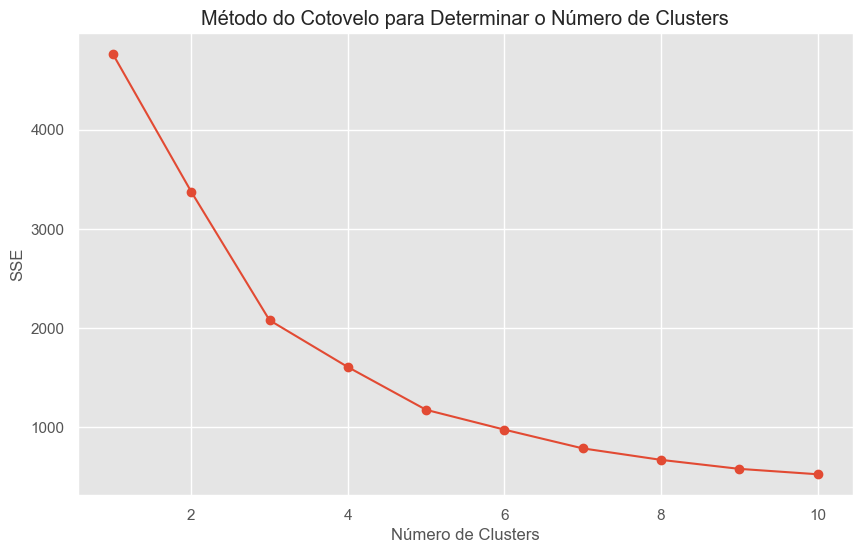

In [8]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Encontrando o número ideal de clusters usando o método do cotovelo
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    sse.append(kmeans.inertia_)

# Plotando o gráfico do cotovelo
plt.figure(figsize=(10,6))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Método do Cotovelo para Determinar o Número de Clusters')
plt.xlabel('Número de Clusters')
plt.ylabel('SSE')
plt.show()


In [9]:
# Aplicando o K-Means com o número ideal de clusters (exemplo: 4 clusters)
kmeans = KMeans(n_clusters=4, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

# Exibindo o resumo dos clusters
print(rfm.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': ['mean', 'count']
}).reset_index())


  Cluster    Recency   Frequency      Monetary      
                mean        mean          mean count
0       0   6.437500  350.125000  19342.835000    16
1       1  16.072917  119.234375   2158.934323   192
2       2  70.890000   24.160000    364.736200   500
3       3  19.664391   26.461889    562.603527   879


C:\Users\Daniel\anaconda3\envs\data_science_env\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


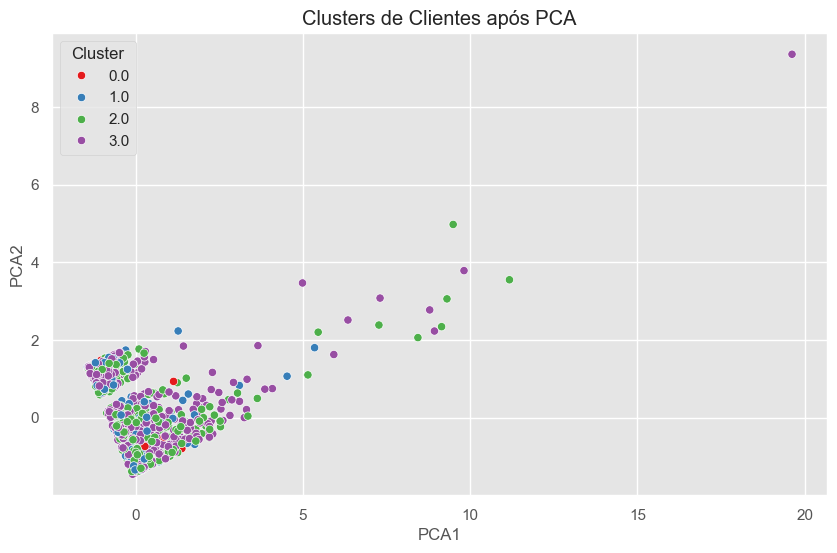

In [10]:
from sklearn.decomposition import PCA

# Reduzindo a dimensionalidade para 2 componentes
pca = PCA(n_components=2)
pca_rfm = pca.fit_transform(rfm_scaled)

# Criando um DataFrame com as projeções PCA e os clusters
pca_df = pd.DataFrame(pca_rfm, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = rfm['Cluster']

# Plotando os clusters
plt.figure(figsize=(10,6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=pca_df, palette='Set1')
plt.title('Clusters de Clientes após PCA')
plt.show()


InvoiceDate
2010-12-01    45867.26
2010-12-02    45656.47
2010-12-03    22553.38
2010-12-05    30970.28
2010-12-06    30258.77
Name: TotalPrice, dtype: float64


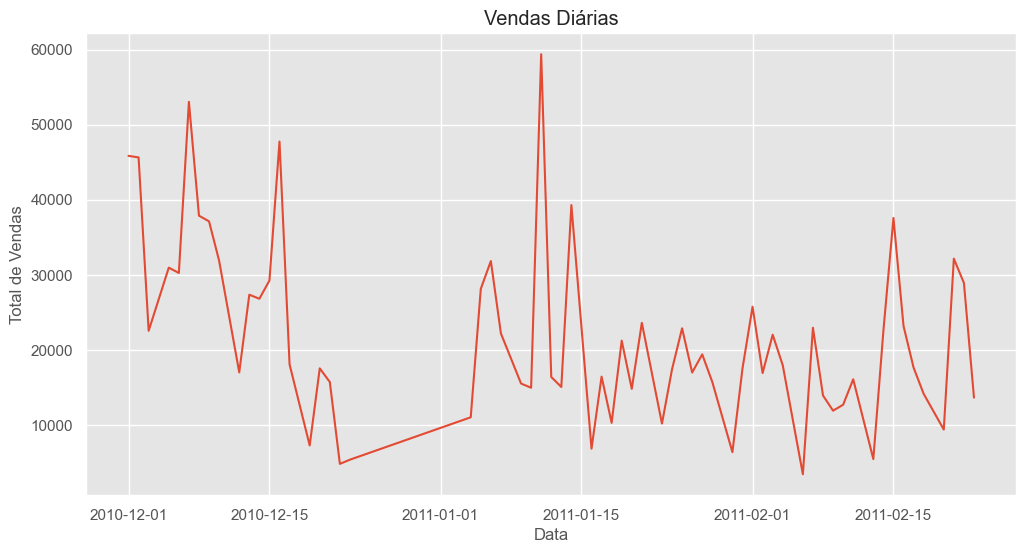

In [11]:
# Certifique-se de que a coluna 'InvoiceDate' está no formato de data
dados['InvoiceDate'] = pd.to_datetime(dados['InvoiceDate'])

# Agrupando os dados por dia e somando as vendas
dados['TotalPrice'] = dados['Quantity'] * dados['UnitPrice']
daily_sales = dados.groupby(dados['InvoiceDate'].dt.date)['TotalPrice'].sum()

# Exibindo as primeiras linhas da série temporal
print(daily_sales.head())

# Plotando a série temporal
plt.figure(figsize=(12,6))
daily_sales.plot()
plt.title('Vendas Diárias')
plt.xlabel('Data')
plt.ylabel('Total de Vendas')
plt.show()


<Figure size 1200x800 with 0 Axes>

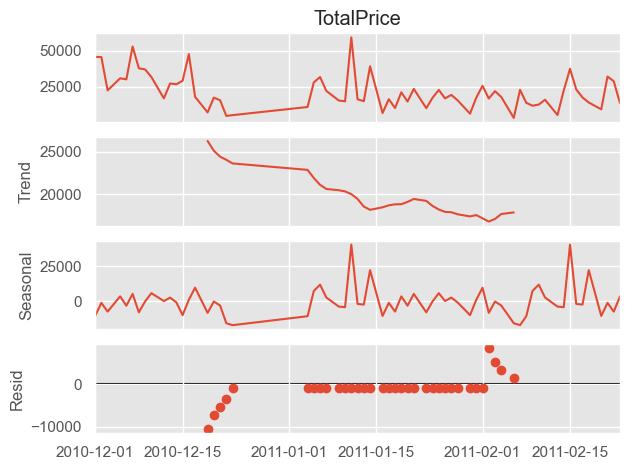

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompondo a série temporal
decomposition = seasonal_decompose(daily_sales, model='additive', period=30)

# Plotando a decomposição
plt.figure(figsize=(12,8))
decomposition.plot()
plt.show()


In [13]:
from statsmodels.tsa.arima.model import ARIMA

# Dividindo os dados em treino e teste
train_size = int(len(daily_sales) * 0.8)
train, test = daily_sales[:train_size], daily_sales[train_size:]

# Ajustando o modelo ARIMA
arima_model = ARIMA(train, order=(5,1,2))  # (p, d, q) devem ser ajustados conforme necessário
arima_result = arima_model.fit()

# Exibindo o sumário do modelo
print(arima_result.summary())


C:\Users\Daniel\anaconda3\envs\data_science_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Daniel\anaconda3\envs\data_science_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Daniel\anaconda3\envs\data_science_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:             TotalPrice   No. Observations:                   51
Model:                 ARIMA(5, 1, 2)   Log Likelihood                -537.254
Date:                Sun, 29 Sep 2024   AIC                           1090.507
Time:                        14:12:42   BIC                           1105.804
Sample:                             0   HQIC                          1096.332
                                 - 51                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5787      0.451     -1.284      0.199      -1.462       0.305
ar.L2          0.0650      0.393      0.165      0.869      -0.705       0.835
ar.L3          0.1665      0.331      0.503      0.6

C:\Users\Daniel\anaconda3\envs\data_science_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Daniel\anaconda3\envs\data_science_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


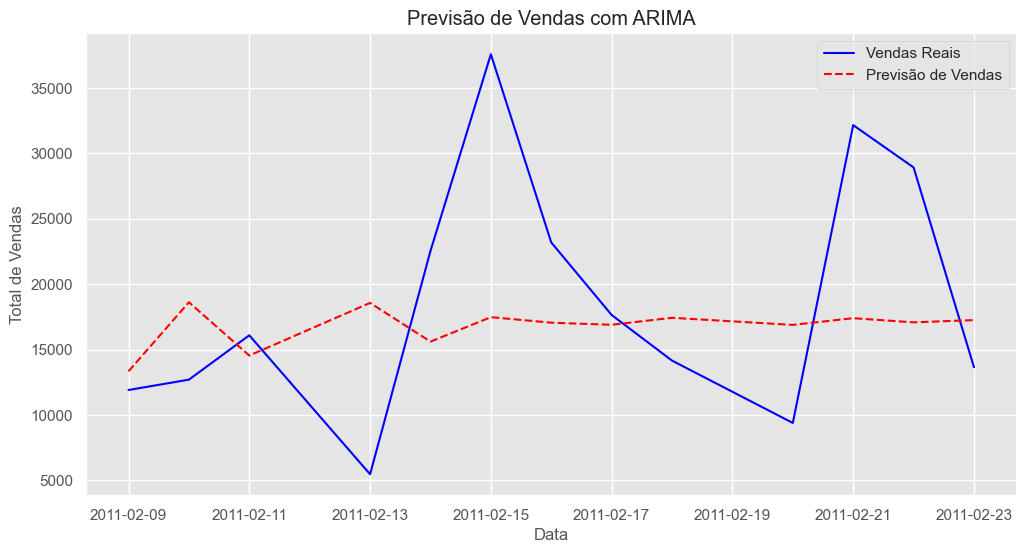

In [14]:
# Fazendo previsões
forecast = arima_result.forecast(steps=len(test))

# Plotando as previsões versus os dados reais
plt.figure(figsize=(12,6))
plt.plot(test.index, test, label='Vendas Reais', color='blue')
plt.plot(test.index, forecast, label='Previsão de Vendas', color='red', linestyle='--')
plt.title('Previsão de Vendas com ARIMA')
plt.xlabel('Data')
plt.ylabel('Total de Vendas')
plt.legend()
plt.show()


In [15]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Calculando o erro quadrático médio (RMSE)
rmse = np.sqrt(mean_squared_error(test, forecast))
print(f'RMSE do modelo ARIMA: {rmse}')


RMSE do modelo ARIMA: 9364.951492431454


In [17]:
# Análise de Cesta de Compras (Market Basket Analysis)
from mlxtend.frequent_patterns import apriori, association_rules

# Criando uma tabela de transações por InvoiceNo e Description
basket = (dados
          .groupby(['InvoiceNo', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('InvoiceNo'))

# Convertendo os valores para 1 e 0 (1 se o produto foi comprado, 0 se não)
def encode_units(x):
    return 1 if x >= 1 else 0

basket = basket.applymap(encode_units)

# Exibindo as primeiras linhas da cesta de compras
print(basket.head())


Description   4 PURPLE FLOCK DINNER CANDLES   OVAL WALL MIRROR DIAMANTE   \
InvoiceNo                                                                  
536365                                    0                            0   
536366                                    0                            0   
536367                                    0                            0   
536368                                    0                            0   
536369                                    0                            0   

Description   SET 2 TEA TOWELS I LOVE LONDON   10 COLOUR SPACEBOY PEN  \
InvoiceNo                                                               
536365                                      0                       0   
536366                                      0                       0   
536367                                      0                       0   
536368                                      0                       0   
536369                       

In [18]:
# Aplicando o Algoritmo Apriori
frequent_itemsets = apriori(basket, min_support=0.01, use_colnames=True)

# Exibindo os conjuntos de itens frequentes
print(frequent_itemsets.head())


C:\Users\Daniel\anaconda3\envs\data_science_env\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


    support                               itemsets
0  0.022149     ( SET 2 TEA TOWELS I LOVE LONDON )
1  0.011711               (10 COLOUR SPACEBOY PEN)
2  0.010947        (12 PENCIL SMALL TUBE WOODLAND)
3  0.016802  (12 PENCILS SMALL TUBE RED RETROSPOT)
4  0.014511          (12 PENCILS SMALL TUBE SKULL)


In [19]:
# Gerando regras de associação
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Exibindo as primeiras regras geradas
print(rules.head())

# Ordenando as regras por confiança para encontrar as mais relevantes
rules = rules.sort_values('confidence', ascending=False)
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head())


                            antecedents                           consequents  \
0         (60 TEATIME FAIRY CAKE CASES)      (72 SWEETHEART FAIRY CAKE CASES)   
1      (72 SWEETHEART FAIRY CAKE CASES)         (60 TEATIME FAIRY CAKE CASES)   
2  (PACK OF 60 PINK PAISLEY CAKE CASES)         (60 TEATIME FAIRY CAKE CASES)   
3         (60 TEATIME FAIRY CAKE CASES)  (PACK OF 60 PINK PAISLEY CAKE CASES)   
4     (PACK OF 72 RETROSPOT CAKE CASES)         (60 TEATIME FAIRY CAKE CASES)   

   antecedent support  consequent support   support  confidence       lift  \
0            0.030550            0.034369  0.011711    0.383333  11.153580   
1            0.034369            0.030550  0.011711    0.340741  11.153580   
2            0.026477            0.030550  0.011711    0.442308  14.478205   
3            0.030550            0.026477  0.011711    0.383333  14.478205   
4            0.047607            0.030550  0.016039    0.336898  11.027807   

   leverage  conviction  zhangs_metric  
0  

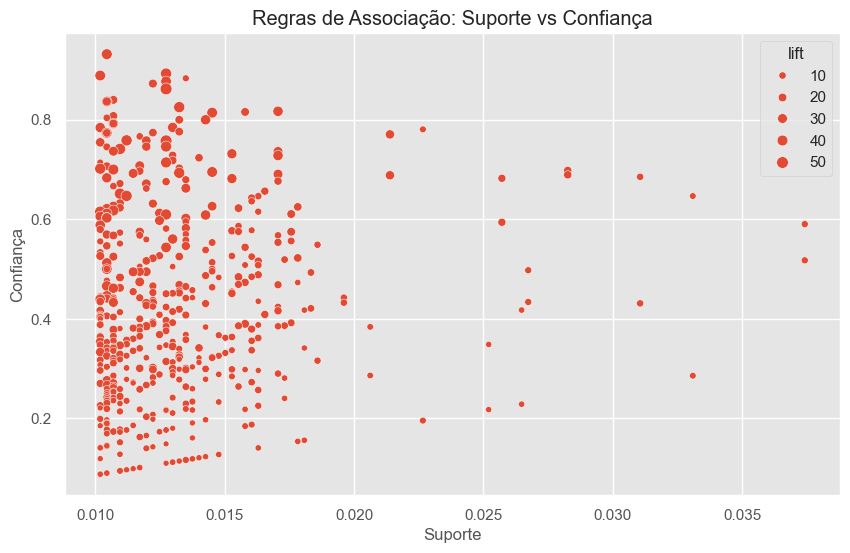

In [20]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="support", y="confidence", size="lift", data=rules)
plt.title('Regras de Associação: Suporte vs Confiança')
plt.xlabel('Suporte')
plt.ylabel('Confiança')
plt.show()


In [ ]:
Previsão de Churn de Clientes (Customer Churn Prediction)

In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler


# Feature Engineering - Calculando variáveis RFM (Recency, Frequency, Monetary)
dados['InvoiceDate'] = pd.to_datetime(dados['InvoiceDate'])
dados['TotalPrice'] = dados['Quantity'] * dados['UnitPrice']

# Recência (dias desde a última compra)
data_ref = dados['InvoiceDate'].max()  # Data mais recente no dataset
rfm = dados.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (data_ref - x.max()).days,  # Recency
    'InvoiceNo': 'count',  # Frequency
    'TotalPrice': 'sum'  # Monetary Value
}).reset_index()

# Renomeando as colunas
rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

# Definindo se o cliente deu churn: Recency > 60 dias
rfm['Churn'] = np.where(rfm['Recency'] > 60, 1, 0)  # Churn é 1 se não comprou há mais de 60 dias

# Dividindo os dados em features (X) e target (y)
X = rfm[['Recency', 'Frequency', 'Monetary']]
y = rfm['Churn']

# Padronizando os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividindo em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


In [22]:
# Treinando o modelo Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Fazendo previsões
y_pred = rf_model.predict(X_test)

# Avaliando o modelo
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Importância das Features
importances = rf_model.feature_importances_
feature_names = ['Recency', 'Frequency', 'Monetary']
feature_importance = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values(by='Importance', ascending=False)

print("Importância das Variáveis:")
print(feature_importance)


Confusion Matrix:
[[371   0]
 [  0 129]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       371
           1       1.00      1.00      1.00       129

    accuracy                           1.00       500
   macro avg       1.00      1.00      1.00       500
weighted avg       1.00      1.00      1.00       500

Importância das Variáveis:
     Feature  Importance
0    Recency    0.900624
2   Monetary    0.065778
1  Frequency    0.033598


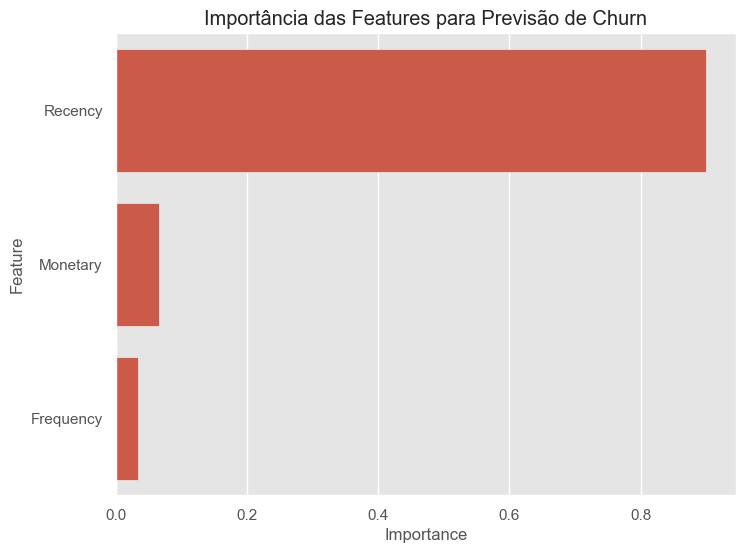

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Gráfico de Importância das Features
plt.figure(figsize=(8,6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Importância das Features para Previsão de Churn')
plt.show()


In [ ]:
2. Análise de Sazonalidade de Produtos (Product Seasonality Analysis)

Produtos com pelo menos 24 observações: []


IndexError: list index out of range

In [ ]:
Sistema de Recomendação (Product Recommendation S

In [26]:
# Criando a matriz de clientes por produtos
basket = (dados.groupby(['CustomerID', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('CustomerID'))

# Convertendo os valores para 1 (comprado) e 0 (não comprado)
basket = basket.applymap(lambda x: 1 if x > 0 else 0)

# Exibindo as primeiras linhas da matriz
print(basket.head())


Description   4 PURPLE FLOCK DINNER CANDLES   OVAL WALL MIRROR DIAMANTE   \
CustomerID                                                                 
12346.0                                   0                            0   
12347.0                                   0                            0   
12348.0                                   0                            0   
12350.0                                   0                            0   
12352.0                                   0                            0   

Description   SET 2 TEA TOWELS I LOVE LONDON   10 COLOUR SPACEBOY PEN  \
CustomerID                                                              
12346.0                                     0                       0   
12347.0                                     0                       0   
12348.0                                     0                       0   
12350.0                                     0                       0   
12352.0                      

In [27]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculando similaridade entre clientes
similarity_matrix = cosine_similarity(basket)

# Exibindo a matriz de similaridade
print(similarity_matrix[:5, :5])


[[0.         0.         0.         0.         0.        ]
 [0.         1.         0.0673435  0.06929589 0.03688556]
 [0.         0.0673435  1.         0.0571662  0.        ]
 [0.         0.06929589 0.0571662  1.         0.        ]
 [0.         0.03688556 0.         0.         1.        ]]


In [28]:
# Função para recomendar produtos para um cliente
def recommend_products(customer_id, basket, similarity_matrix, n_recommendations=5):
    customer_idx = basket.index.get_loc(customer_id)
    similar_customers = similarity_matrix[customer_idx]
    similar_customers_idx = similar_customers.argsort()[-n_recommendations:][::-1]

    # Produtos recomendados
    recommended_products = basket.iloc[similar_customers_idx].sum().sort_values(ascending=False).head(n_recommendations)

    return recommended_products.index.tolist()

# Exemplo de recomendação
print(recommend_products(customer_id=17850, basket=basket, similarity_matrix=similarity_matrix))


['WOODEN PICTURE FRAME WHITE FINISH', 'WOODEN FRAME ANTIQUE WHITE ', 'WOOD S/3 CABINET ANT WHITE FINISH', 'WOOD 2 DRAWER CABINET WHITE FINISH', 'HEART OF WICKER LARGE']


In [ ]:
Análise de Retenção e Engajamento dos Clientes (Customer Retention and Engagement Analysis)

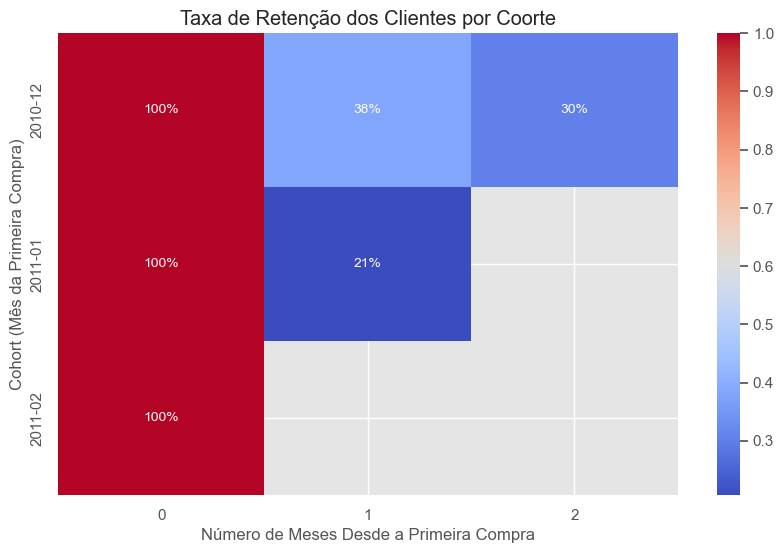

In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Preparando os dados de coorte
dados['InvoiceDate'] = pd.to_datetime(dados['InvoiceDate'])
dados['CohortMonth'] = dados.groupby('CustomerID')['InvoiceDate'].transform('min').dt.to_period('M')
dados['InvoiceMonth'] = dados['InvoiceDate'].dt.to_period('M')

# Agrupando clientes por coorte e mês da compra
cohort_data = dados.groupby(['CohortMonth', 'InvoiceMonth']).agg({
    'CustomerID': pd.Series.nunique
}).reset_index()

# Criando o índice de coorte (tempo desde o mês da primeira compra)
cohort_data['CohortIndex'] = (cohort_data['InvoiceMonth'] - cohort_data['CohortMonth']).apply(lambda x: x.n)

# Pivotando os dados de coorte
cohort_pivot = cohort_data.pivot(index='CohortMonth', columns='CohortIndex', values='CustomerID')

# Calculando a taxa de retenção
cohort_size = cohort_pivot.iloc[:, 0]
retention_rate = cohort_pivot.divide(cohort_size, axis=0)

# Visualizando a taxa de retenção como um heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(retention_rate, annot=True, fmt='.0%', cmap='coolwarm')
plt.title('Taxa de Retenção dos Clientes por Coorte')
plt.xlabel('Número de Meses Desde a Primeira Compra')
plt.ylabel('Cohort (Mês da Primeira Compra)')
plt.show()


RMSE: 580.7436525042486


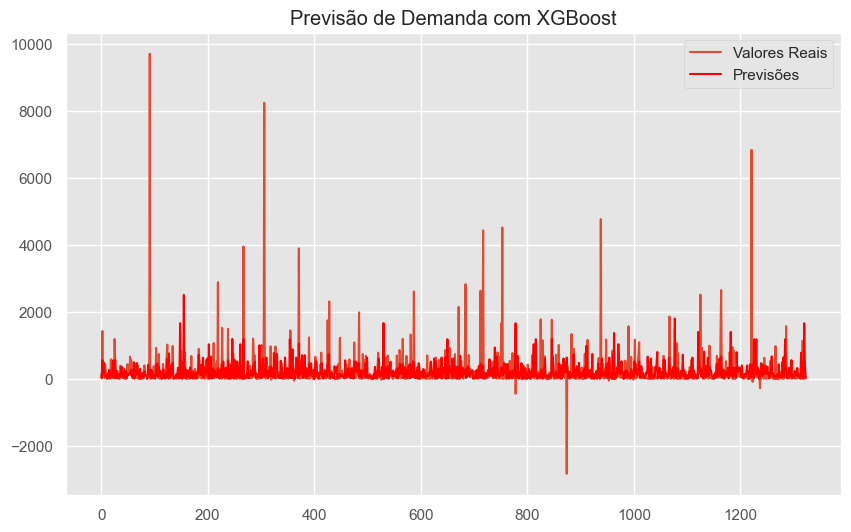

In [42]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Convertendo a data para o formato correto
dados['InvoiceDate'] = pd.to_datetime(dados['InvoiceDate'])

# Criando a variável TotalPrice (Quantidade * Preço Unitário)
dados['TotalPrice'] = dados['Quantity'].astype(float) * dados['UnitPrice'].astype(float)

# Agrupando as vendas por mês e produto
monthly_sales = dados.groupby([dados['InvoiceDate'].dt.to_period('M'), 'StockCode']).agg({
    'TotalPrice': 'sum'
}).reset_index()

# Preparando os dados de treino
# Convertendo os dados categóricos para numéricos
monthly_sales['StockCode'] = monthly_sales['StockCode'].astype('category').cat.codes
monthly_sales['InvoiceDate'] = monthly_sales['InvoiceDate'].astype('category').cat.codes

X = monthly_sales[['InvoiceDate', 'StockCode']]
y = monthly_sales['TotalPrice']

# Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criando o modelo XGBoost
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, seed=42)
xg_reg.fit(X_train, y_train)

# Fazendo previsões de demanda
preds = xg_reg.predict(X_test)

# Avaliando o modelo
rmse = np.sqrt(mean_squared_error(y_test, preds))
print(f"RMSE: {rmse}")

# Visualizando as previsões
plt.figure(figsize=(10,6))
plt.plot(y_test.reset_index(drop=True), label='Valores Reais')
plt.plot(preds, label='Previsões', color='red')
plt.legend()
plt.title('Previsão de Demanda com XGBoost')
plt.show()


In [43]:
# Definindo o estoque ideal com base nas previsões de demanda
estoque_ideal = preds * 1.2  # Mantendo 20% de folga no estoque

# Criando um DataFrame com as previsões de demanda e os níveis de estoque sugeridos
df_estoque = pd.DataFrame({'Previsão de Demanda': preds, 'Estoque Ideal': estoque_ideal})

# Exibindo os 5 primeiros resultados
print(df_estoque.head())


   Previsão de Demanda  Estoque Ideal
0            52.228268      62.673923
1            45.169140      54.202969
2           561.662354     673.994873
3           129.247955     155.097549
4           385.091644     462.109985


In [ ]:
 Modelagem de Demanda e Planejamento de Estoque (Demand Forecasting and Stock Planning)